# EXPERIMENTS COLONNE 3D / Semaine du 26 février au 1 mars 

Pour les premiers experiences avec la colonne 3D, on a commencé par le montage du capteur du $CO_{2}$. On messure donc la concentration du $CO_{2}$ en haut de la colonne, en faisant passer le gaz par dessus. 

## Premier test sans mousse

Pour un premier test, on fait passer le gaz au dessous de la colonne, et on messure la concentration en function du temps avec le capteur situé au bout de l'hauteur. Après la concentration du gaz prend une valeur stable et maximale, on arrete le $CO_2$ et on injecte de l'air, et on messure aussi la concentration du $CO_2$ en function du temps.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

In [2]:
file_path='/home/ruben/M2-THESE-RUBEN-LIPHY/test_colonne_sans_mousse_100_co2.csv'
file_path2='/home/ruben/M2-THESE-RUBEN-LIPHY/test_colonne_sans_mousse_co2-vidage.csv'

In [3]:
db=pd.read_csv(file_path)
db2=pd.read_csv(file_path2)

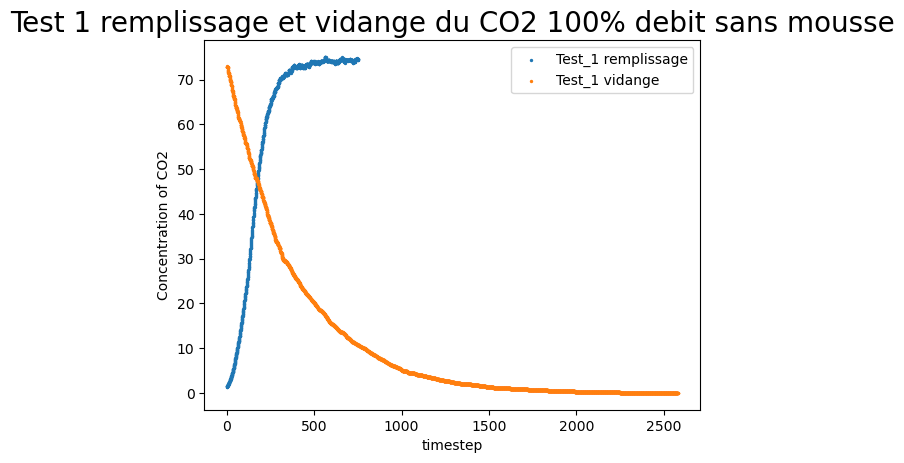

In [4]:
plt.figure()
plt.scatter(db.index/2, db['Media value concentration']/100, label='Test_1 remplissage', marker='o', s=2)
plt.scatter(db2.index/2, db2['Media value concentration']/100, label = 'Test_1 vidange', marker='o', s=2)
plt.xlabel('timestep')
plt.ylabel('Concentration of CO2')
plt.xlabel('timestep')
plt.ylabel('Concentration of CO2')
plt.title('Test 1 remplissage et vidange du CO2 100% debit sans mousse', fontsize=20)
plt.legend()
plt.show()

Les parametres pour ce premier test sont:
- Humidité 44%
- Temperature 19.1 C
- 100 % $CO_2$ débit

## Deuxieme test sans mousse

On repete l'expérience de remplissage et après du vidange du gaz, on a des fichiers avec les résultats:

In [5]:
file_path3='/home/ruben/M2-THESE-RUBEN-LIPHY/test_colonne_sans_mousse_100_co2-2.csv'
file_path4='/home/ruben/M2-THESE-RUBEN-LIPHY/test_colonne_sans_mousse_co2-vidage-2.csv'

In [6]:
db3=pd.read_csv(file_path3)
db4=pd.read_csv(file_path4)

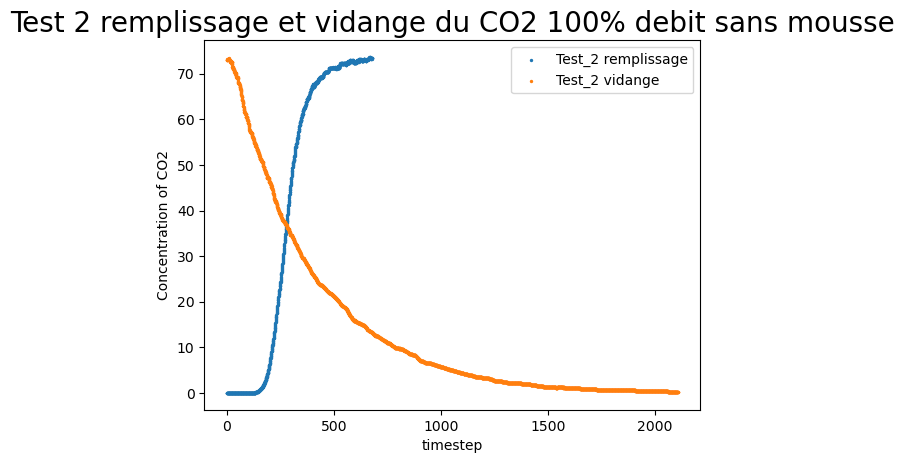

In [7]:
plt.figure()
plt.scatter(db3.index/2, db3['Media value concentration']/100, label='Test_2 remplissage', marker='o', s=2)
plt.scatter(db4.index/2, db4['Media value concentration']/100, label='Test_2 vidange', marker='o', s=2)
plt.xlabel('timestep')
plt.ylabel('Concentration of CO2')
plt.title('Test 2 remplissage et vidange du CO2 100% debit sans mousse', fontsize=20)
plt.legend()
plt.show()

Ici les parametres sont:
- Humidité 40%
- Temperature 19 C
- 100% $CO_2$ débit

## Troisieme test sans mousse

Par contre, pour un troisième test, on a changé le débit du $CO_2$ et on a mis 50%. On a mesuré la concentration du $CO_2$ en function du temps:

In [8]:
file_path5='/home/ruben/M2-THESE-RUBEN-LIPHY/test_colonne_sans_mousse_50_co2.csv'
file_path6='/home/ruben/M2-THESE-RUBEN-LIPHY/test_colonne_sans_mousse_co2-vidage-50.csv'

In [9]:
db5=pd.read_csv(file_path5)
db6=pd.read_csv(file_path6)

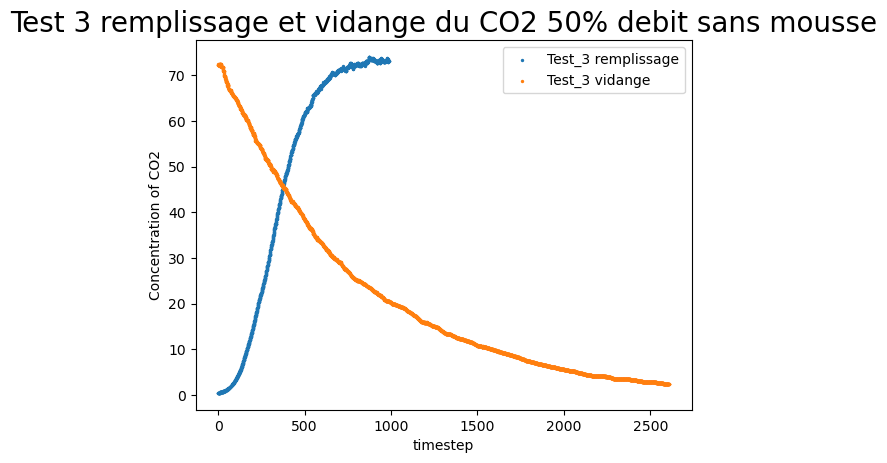

In [10]:
plt.figure()
plt.scatter(db5.index/2, db5['Media value concentration']/100, label='Test_3 remplissage', marker='o', s=2)
plt.scatter(db6.index/2, db6['Media value concentration']/100, label='Test_3 vidange', marker='o', s=2)
plt.xlabel('timestep')
plt.ylabel('Concentration of CO2')
plt.title('Test 3 remplissage et vidange du CO2 50% debit sans mousse', fontsize=20)
plt.legend()
plt.show()

On remarque les differences par rapport au resultats avec 100% $CO_2$

## Quatrieme test

On refait une dernière experience avec 100% débit du gaz et on mesure la concentration du $CO_2$ en function du temps pour comparer avec le test 1 et 2. On obtient les resultats:

In [11]:
file_path7='/home/ruben/M2-THESE-RUBEN-LIPHY/test_colonne_sans_mousse_100_co2-3.csv'
file_path8='/home/ruben/M2-THESE-RUBEN-LIPHY/test_colonne_sans_mousse_co2-vidage-3.csv'

In [12]:
db7=pd.read_csv(file_path7)
db8=pd.read_csv(file_path8)

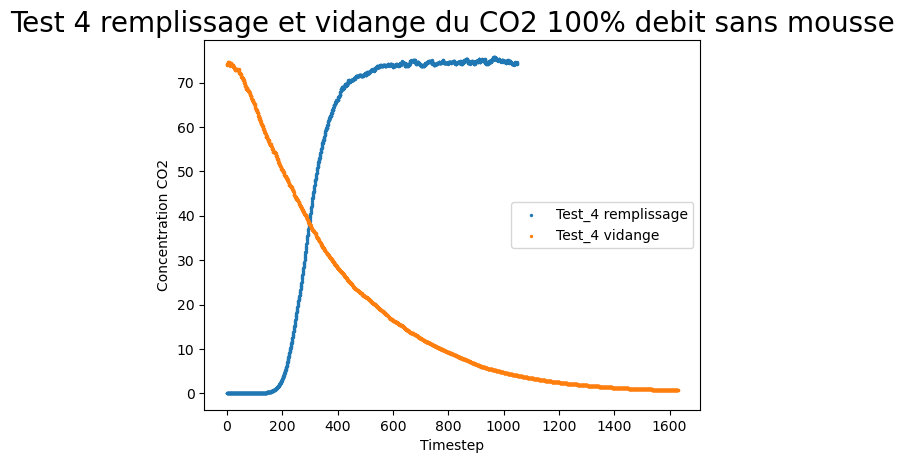

In [13]:
plt.figure()
plt.scatter(db7.index/2, db7['Media value concentration']/100, label='Test_4 remplissage', marker='o', s=2)
plt.scatter(db8.index/2, db8['Media value concentration']/100, label='Test_4 vidange', marker='o', s=2)
plt.xlabel('Timestep')
plt.ylabel('Concentration CO2')
plt.legend()
plt.title('Test 4 remplissage et vidange du CO2 100% debit sans mousse', fontsize=20)
plt.show()

***

## Fit functions

On essaie de trouver une function fitting, de maniêre qu'on puisse être capable de décrire le comportement des donnés obtenues. 
Pour le comportement du vidange du $CO_2$, on utilise ce modèle exponentiel:

<span style="font-size: 3em;"> $f=Ae^{-Bx+\phi}+C$ </span>

In [14]:
def func(x, a, b, c, phi):
    return a*np.exp(-b*x+phi)+c

Par rapport au remplissage du $CO_2$, on utilise le modèle suivant:

<span style="font-size: 3em;"> $f=\frac{A}{1+\frac{A-C}{C}e^{-Bx+\phi}} $ </span>

In [15]:
def func2(x, a, b, c, phi):
    return a/(1+((a-c)/c)*np.exp(-b*x+phi)) 

Où $f$ est la concentration du gaz, $x$ le temps, et $A$, $B$, $C$ et $\phi$ sont des parametres à determiner. Donc on utilise ces modèles et on determine les parametres pour chaque une des experiences:

In [16]:
xdata2=db2.index/2  ### TEST 1 VIDANGE
popt2, pcov2=curve_fit(func, xdata2, db2['Media value concentration']/100)#, bounds=(0, [75., 1., 0.5]))
popt2

/home/ruben/anaconda3/lib/python3.11/site-packages/pandas/core/indexes/base.py:945: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*new_inputs, **kwargs)


array([ 5.96476786e+00,  2.61130271e-03, -6.00231369e-02,  2.51156736e+00])

In [17]:
xdata6=db.index/2   ### TEST 1 REMPLISSAGE
popt6, pcov6=curve_fit(func2, xdata6, db['Media value concentration']/100)
popt6

array([7.36813815e+01, 2.06602460e-02, 8.15361997e+00, 9.68407143e-01])

On obtient donc la function fit pour la premiere experience:

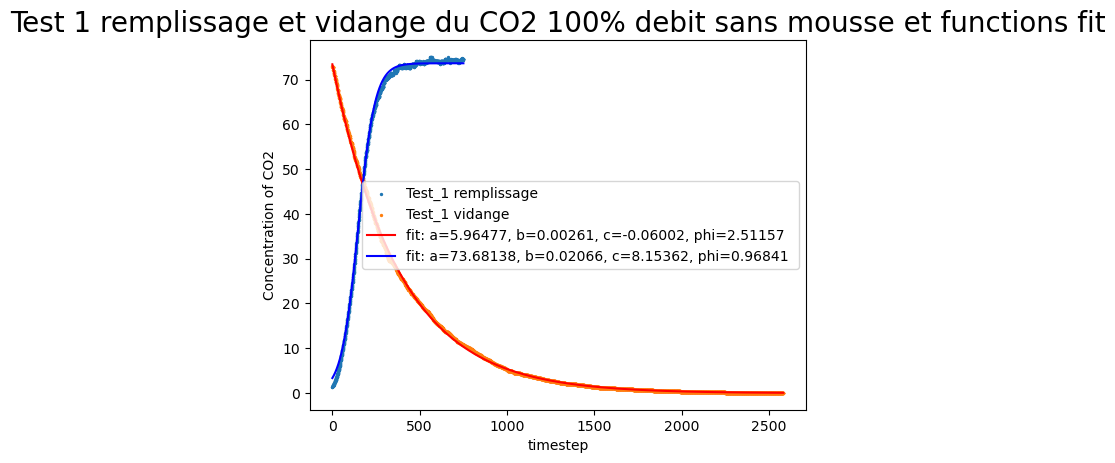

In [18]:
plt.figure()
plt.scatter(db.index/2, db['Media value concentration']/100, label='Test_1 remplissage', marker='o', s=2)
plt.scatter(db2.index/2, db2['Media value concentration']/100, label = 'Test_1 vidange', marker='o', s=2)
plt.plot(xdata2, func(xdata2, *popt2), 'r-', label='fit: a=%5.5f, b=%5.5f, c=%5.5f, phi=%5.5f ' % tuple(popt2))
plt.plot(xdata6, func2(xdata6, *popt6), 'b-', label='fit: a=%5.5f, b=%5.5f, c=%5.5f, phi=%5.5f ' % tuple(popt6))
plt.xlabel('timestep')
plt.ylabel('Concentration of CO2')
plt.xlabel('timestep')
plt.ylabel('Concentration of CO2')
plt.title('Test 1 remplissage et vidange du CO2 100% debit sans mousse et functions fit', fontsize=20)
plt.legend()
plt.show()

On observe un valeur de B pour le vidange du gaz de 0.00261 et 0.02066 pour le remplissage. Ca correspond au valeur du constant du temps caracteristique de:

In [19]:
tau=1/0.00261
tau

383.1417624521073

In [20]:
tau2=1/0.02066
tau2

48.402710551790896

On obtient un temps 8 fois plus grande pour le vidange du gaz que pour le remplissage. 

## fit function pour le deuxieme test

En utilisant les memes modèles pour le vidange et pour le remplissage:

In [21]:
xdata3=db4.index/2   ### TEST 2 VIDANGE
popt3, pcov3=curve_fit(func, xdata3, db4['Media value concentration']/100)#, bounds=(0, [75., 1., 0.5]))
popt3

array([ 4.24630497e+00,  2.61423310e-03, -1.97155478e-02,  2.89453063e+00])

In [22]:
xdata7=db3.index/2  ### TEST 2 REMPLISSAGE
popt7, pcov7=curve_fit(func2, xdata7, db3['Media value concentration']/100)
popt7

array([7.16881536e+01, 2.57243142e-02, 2.12874980e+00, 3.68225984e+00])

On obtient donc les functions fit pour le deuxieme test:

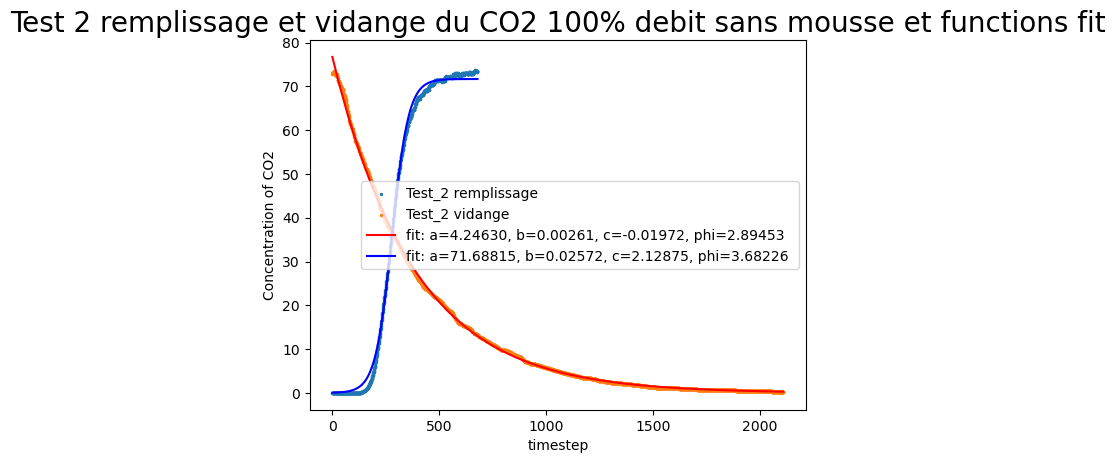

In [23]:
plt.figure()
plt.scatter(db3.index/2, db3['Media value concentration']/100, label='Test_2 remplissage', marker='o', s=2)
plt.scatter(db4.index/2, db4['Media value concentration']/100, label='Test_2 vidange', marker='o', s=2)
plt.plot(xdata3, func(xdata3, *popt3), 'r-', label='fit: a=%5.5f, b=%5.5f, c=%5.5f, phi=%5.5f  ' % tuple(popt3))
plt.plot(xdata7, func2(xdata7, *popt7), 'b-', label='fit: a=%5.5f, b=%5.5f, c=%5.5f, phi=%5.5f ' % tuple(popt7))
plt.xlabel('timestep')
plt.ylabel('Concentration of CO2')
plt.title('Test 2 remplissage et vidange du CO2 100% debit sans mousse et functions fit', fontsize=20)
plt.legend()
plt.show()

On obtient un peu près les memes valeurs pour b, le coefficient du temps caracteristique. Donc on a:

In [24]:
tau=1/0.00261
tau

383.1417624521073

Le temps caracteritique pour le vidange du gaz et:

In [25]:
tau2=1/0.02572
tau2

38.88024883359253

Pour le remplissage du gaz. On observe plus ou moins 9, 10 fois plus du temps pour le vidange que pour le remplissage cette fois.

## fit function pour le troisieme test

On fait pareil pour le troisieme test, en sachant que celui-là a été fait à 50% débit:

In [26]:
xdata4=db6.index/2   ### TEST 3 VIDANGE
popt4, pcov4=curve_fit(func, xdata4, db6['Media value concentration']/100)#, bounds=(0, [75., 1., 0.5]))
popt4

array([4.32128703e+00, 1.30419217e-03, 1.94994821e-01, 2.83578951e+00])

In [27]:
xdata8=db5.index/2  ### TEST 3 REMPLISSAGE
popt8, pcov8=curve_fit(func2, xdata8, db5['Media value concentration']/100)
popt8

array([7.25208727e+01, 1.07961618e-02, 1.27255566e+01, 2.02465097e+00])

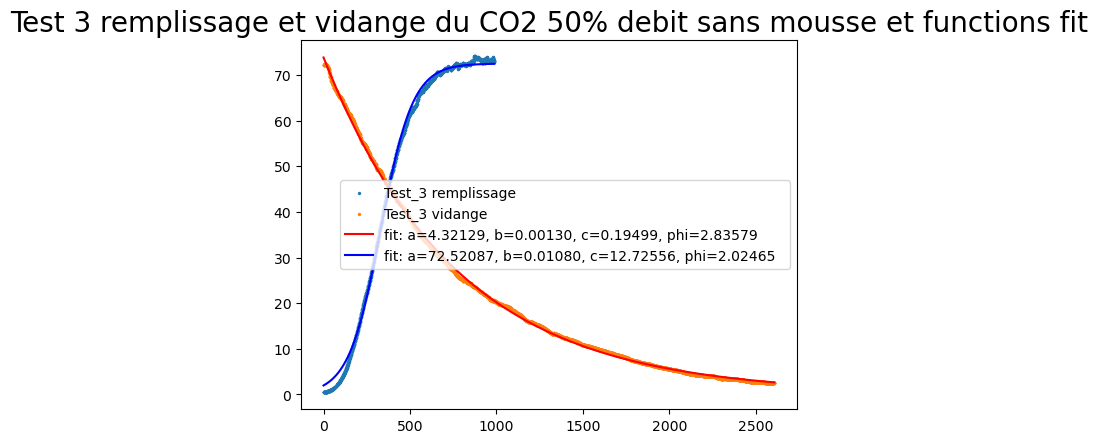

In [28]:
plt.figure()
plt.scatter(db5.index/2, db5['Media value concentration']/100, label='Test_3 remplissage', marker='o', s=2)
plt.scatter(db6.index/2, db6['Media value concentration']/100, label='Test_3 vidange', marker='o', s=2)
plt.plot(xdata4, func(xdata4, *popt4), 'r-', label='fit: a=%5.5f, b=%5.5f, c=%5.5f, phi=%5.5f  ' % tuple(popt4))
plt.plot(xdata8, func2(xdata8, *popt8), 'b-', label='fit: a=%5.5f, b=%5.5f, c=%5.5f, phi=%5.5f  ' % tuple(popt8))
plt.title('Test 3 remplissage et vidange du CO2 50% debit sans mousse et functions fit', fontsize=20)
plt.legend()
plt.show()

On obtient, pour le vidange du gaz, un temps caracteristique de:

In [29]:
tau3=1/0.00130
tau3

769.2307692307693

In [30]:
tau3/tau

2.0076923076923077

qui est 2 fois le temps caracteristique par raport au 100% debit $CO_2$

Pour le remplissage du gaz le temps caracteristique est:

In [31]:
tau4=1/0.01080
tau4

92.59259259259258

In [32]:
tau4/tau2

2.3814814814814813

qui est aussi plus ou moins 2 fois le temps par rapport au 100% debit du $CO_2$

## fit function pour le quatrieme test

On fait le calcul pour le 4 test, surtout pour comparer les temps caracteristiques du vidange et remplissage, car dans les deux premieres experiences à 100% $CO_2$ on a observé une ratio de 8~9. 

In [33]:
xdata=db8.index/2   #### TEST 4 VIDANGE
popt, pcov=curve_fit(func, xdata, db8['Media value concentration']/100)#, bounds=(0, [75., 1., 0.5]))
popt

array([ 7.23198764e+00,  2.50593021e-03, -1.61072616e+00,  2.44252115e+00])

In [34]:
xdata5=db7.index/2   #### TEST 4 REMPLISSAGE
popt5, pcov5=curve_fit(func2, xdata5, db7['Media value concentration']/100)
popt5

array([7.40069405e+01, 2.47921983e-02, 2.15600553e+01, 6.51636035e+00])

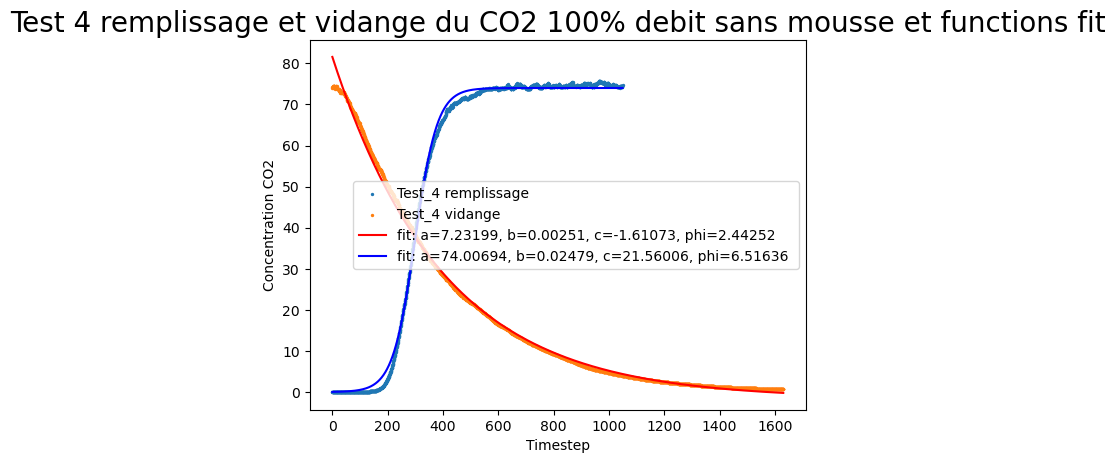

In [35]:
plt.figure()
plt.scatter(db7.index/2, db7['Media value concentration']/100, label='Test_4 remplissage', marker='o', s=2)
plt.scatter(db8.index/2, db8['Media value concentration']/100, label='Test_4 vidange', marker='o', s=2)
plt.plot(xdata, func(xdata, *popt), 'r-', label='fit: a=%5.5f, b=%5.5f, c=%5.5f, phi=%5.5f ' % tuple(popt))
plt.plot(xdata5, func2(xdata5, *popt5), 'b-', label='fit: a=%5.5f, b=%5.5f, c=%5.5f, phi=%5.5f ' % tuple(popt5))
plt.xlabel('Timestep')
plt.ylabel('Concentration CO2')
plt.title('Test 4 remplissage et vidange du CO2 100% debit sans mousse et functions fit', fontsize=20)
plt.legend()
plt.show()

On voit, pour le vidange du gaz, un temps caracteristique de:

In [36]:
tau=1/0.00251
tau

398.40637450199205

et pour le remplissage:

In [37]:
tau2=1/0.02479
tau2

40.338846308995564

In [38]:
tau/tau2

9.876494023904383

qui correspond, encore entre 9 ~ 10 plus petit par rapport au temps caracteristique de vidange.

# Experiences en utilisant une colonne de mousse

## Premier test avec de la mousse

Pour une première experience, on utilise une colonne de mousse en utilisant SDS comme surfactant, et on messure la concentration du $CO_2$ en function du temps. Pour ces premières expèriences on utilise 15% debit $CO_2$

In [39]:
file_path='/home/ruben/M2-THESE-RUBEN-LIPHY/Tests_colonne_mousse_3D/test-colonne-3d-co2-15.csv'
file_path2='/home/ruben/M2-THESE-RUBEN-LIPHY/Tests_colonne_mousse_3D/test-colonne-3d-co2-15-vidange.csv'
file_path3='/home/ruben/M2-THESE-RUBEN-LIPHY/Tests_colonne_mousse_3D/test-colonne-3d-co2-15-2.csv'
file_path4='/home/ruben/M2-THESE-RUBEN-LIPHY/Tests_colonne_mousse_3D/test-colonne-3d-co2-15-vidange-2.csv'
db=pd.read_csv(file_path)
db2=pd.read_csv(file_path2)
db3=pd.read_csv(file_path3)
db4=pd.read_csv(file_path4)

On utilise les mêmes modèles pour le fit:

In [40]:
xdata=db.index/2   #### TEST 1 REMPLISSAGE
popt, pcov=curve_fit(func2, xdata, db['Media concentration value']/100)
popt
xdata2=db2.index/2 ### TEST 1 VIDANGE
popt2, pcov2=curve_fit(func, xdata2, db2['Media concentration value']/100)
popt2

/home/ruben/anaconda3/lib/python3.11/site-packages/pandas/core/indexes/base.py:945: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*new_inputs, **kwargs)


array([ 6.73864199e+00,  2.21262681e-04, -3.81803881e+01,  2.92049819e+00])

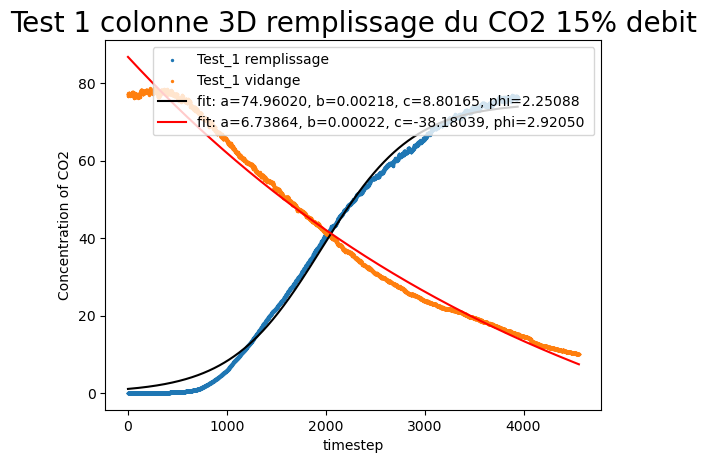

In [42]:
plt.figure()
plt.scatter(db.index/2, db['Media concentration value']/100, label='Test_1 remplissage', marker='o', s=2)
plt.scatter(db2.index/2, db2['Media concentration value']/100, label='Test_1 vidange', marker='o', s=2)
plt.plot(xdata, func2(xdata, *popt), 'k-', label='fit: a=%5.5f, b=%5.5f, c=%5.5f, phi=%5.5f ' % tuple(popt))
plt.plot(xdata2, func(xdata2, *popt2), 'r-', label='fit: a=%5.5f, b=%5.5f, c=%5.5f, phi=%5.5f ' % tuple(popt2))
plt.xlabel('timestep')
plt.ylabel('Concentration of CO2')
plt.xlabel('timestep')
plt.ylabel('Concentration of CO2')
plt.legend()
plt.title('Test 1 colonne 3D remplissage du CO2 15% debit', fontsize=20)
plt.show()

## Deuxieme test avec la mousse

Pour le premier test, le experiment du vidange du $CO_2$ a pas été bien controlé a la fin car on n'a pas attendu que le systeme estabilisait jusqu'à 0 $CO_2$ concentration, et pareil pour le remplissage. Donc, on a refait une deuxieme experience avec les mêmes conditions.

In [43]:
xdata3=db3.index/2  ### TEST 2 REMPLISSAGE
popt3, pcov3=curve_fit(func2, xdata3, db3['Media concentration value']/100)
popt3
xdata4=db4.index/2  #### TEST 2 VIDANGE
popt4, pcov4=curve_fit(func, xdata4, db4['Media value concentration']/100)
popt4

array([ 6.56606592e+00,  4.30476204e-04, -3.47224268e+00,  2.83454533e+00])

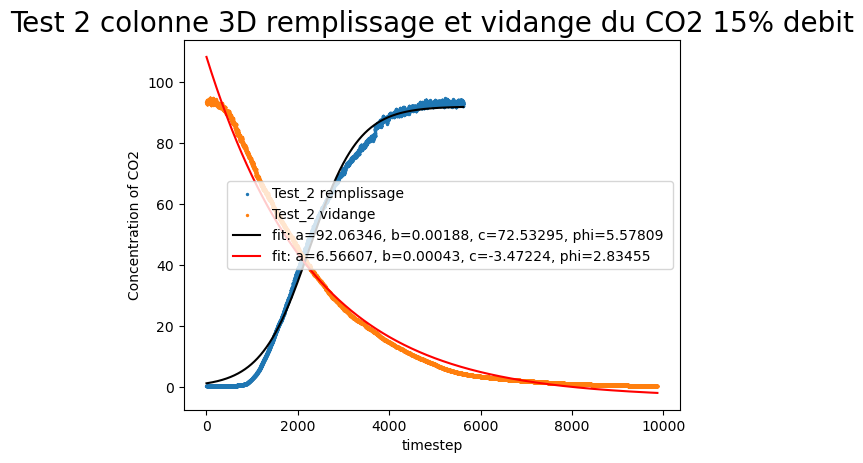

In [44]:
plt.figure()
plt.scatter(db3.index/2, db3['Media concentration value']/100, label='Test_2 remplissage', marker='o', s=2)
plt.scatter(db4.index/2, db4['Media value concentration']/100, label='Test_2 vidange', marker='o', s=2)
plt.plot(xdata3, func2(xdata3, *popt3), 'k-', label='fit: a=%5.5f, b=%5.5f, c=%5.5f, phi=%5.5f ' % tuple(popt3))
plt.plot(xdata4, func(xdata4, *popt4), 'r-', label='fit: a=%5.5f, b=%5.5f, c=%5.5f, phi=%5.5f ' % tuple(popt4))
plt.xlabel('timestep')
plt.ylabel('Concentration of CO2')
plt.xlabel('timestep')
plt.ylabel('Concentration of CO2')
plt.legend()
plt.title('Test 2 colonne 3D remplissage et vidange du CO2 15% debit', fontsize=20)
plt.show()

On obtient un temps caracteristique pour le remplissage de:

In [45]:
tau=1/0.00188
tau

531.9148936170213

Qui est un peu plus de 10 fois le temps caracteristique du remplisage du gaz sans la mousse. Pour le vidange du gaz on obtient:

In [46]:
tau2=1/0.00043
tau2

2325.5813953488373

qui est un peu plus de 5 fois le temps caracteristique du vidange du gaz sans la mousse, et presque 5 fois aussi plus grande par rapport au temps caracteristique du remplissage du gaz avec la mousse. 